In [11]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt


from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression



In [12]:
data=pd.read_excel('clinical_radiomics_imported_from_tsv.xlsx')
x=data.loc[:,'original_shape_Elongation':'original_ngtdm_Strength']
y=data.loc[:,'MFS_cens']

In [13]:
x_train, x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=20)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


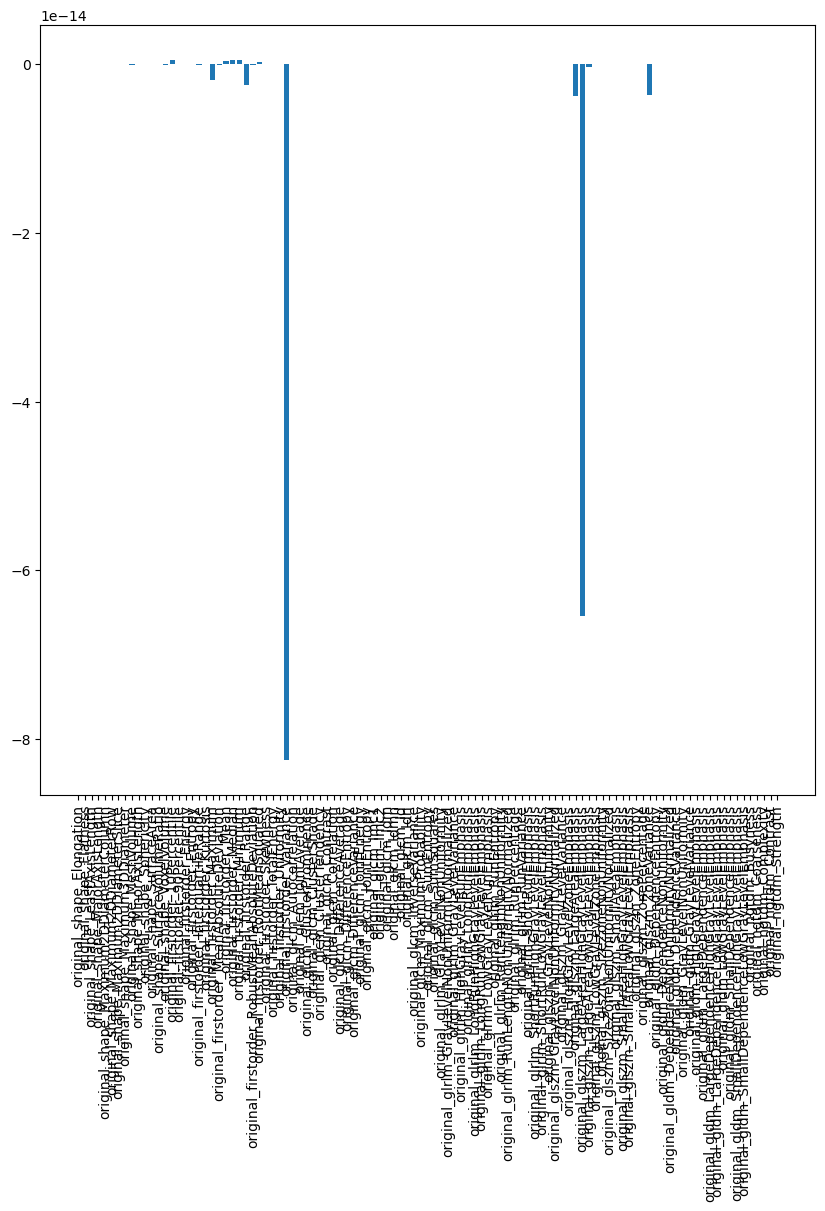

                                   Features   Coefficient
0                 original_shape_Elongation -2.021629e-22
1                   original_shape_Flatness -3.210308e-22
2            original_shape_LeastAxisLength -2.175898e-20
3            original_shape_MajorAxisLength -4.904888e-20
4    original_shape_Maximum2DDiameterColumn -6.329051e-20
..                                      ...           ...
100                 original_ngtdm_Busyness -9.889047e-20
101               original_ngtdm_Coarseness  3.079752e-23
102               original_ngtdm_Complexity  1.217268e-20
103                 original_ngtdm_Contrast  9.340622e-23
104                 original_ngtdm_Strength  9.840747e-22

[105 rows x 2 columns]


In [18]:
# regressor = Lasso(alpha=1.9)
# regressor.fit(x_train, y_train)
# important_features = np.where(regressor.coef_ != 0)[0]

# X_train_reduced = x_train.iloc[:, important_features]
# X_test_reduced = x_test.iloc[:, important_features]


regressor = Ridge(alpha=1)
regressor.fit(x_train, y_train)
important_features = np.where(regressor.coef_ != 0)[0]
column_names = x_train.columns
fig = plt.figure(figsize=(10, 10))
plt.bar(column_names,regressor.coef_)
# grouped_data = x_train.groupby('category').sum()
# grouped_data.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

coef_tab=pd.DataFrame(list(zip(column_names,regressor.coef_)),columns=['Features','Coefficient'])
print(coef_tab)

X_train_reduced = x_train.iloc[:, important_features]
X_test_reduced = x_test.iloc[:, important_features]

In [15]:
scaler=RobustScaler()
X_train_final=scaler.fit_transform(X_train_reduced)
X_test_final=scaler.transform(X_test_reduced)


In [16]:
model = LogisticRegression(random_state=0).fit(X_train_final, y_train)
# Trenowanie modelu
# model.fit(X_train_final, y_train)

# Predykcja dla zbioru testowego
y_pred = model.predict(X_test_final)
y_pred_1 = model.predict(X_train_final)

# Wyświetlenie dokładności predykcji
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_train, y_pred_1))

Accuracy: 0.6296296296296297
Accuracy: 0.8653846153846154


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
